In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Cho dữ liệu poverty.txt
# Yêu cầu: Thực hiện linenear regression để từ Poverty Level => dự
đoán Teen Birth Rate
1. Đọc dữ liệu, chuẩn hóa dữ liệu nếu cần. Trực quan hóa dữ liệu.
2. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được là 2 cột PovPct (inputs) và Brth15to17
(outputs) với tỷ lệ dữ liệu test là 0.2
3. Áp dụng linrear regression
4. Vẽ hình. Nhận xét kết quả
5. Nếu PovPct là 16 => Brth15to17 là bao nhiêu?

In [2]:
data = pd.read_csv('poverty.txt',sep='\t')
data.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    51 non-null     object 
 1   PovPct      51 non-null     float64
 2   Brth15to17  51 non-null     float64
 3   Brth18to19  51 non-null     float64
 4   ViolCrime   51 non-null     float64
 5   TeenBrth    51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


<AxesSubplot: xlabel='PovPct', ylabel='Brth15to17'>

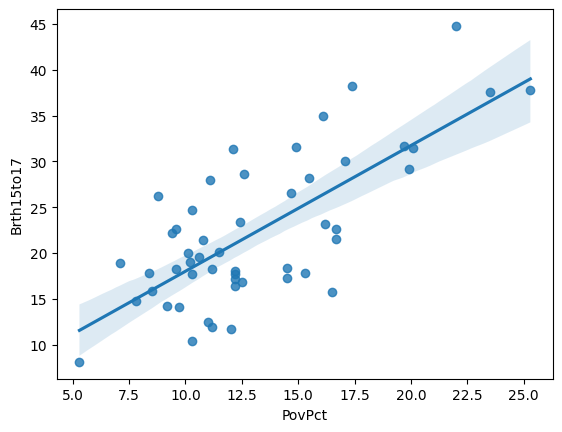

In [4]:
sns.regplot(data=data, x='PovPct',y='Brth15to17')

<AxesSubplot: xlabel='PovPct', ylabel='Brth15to17'>

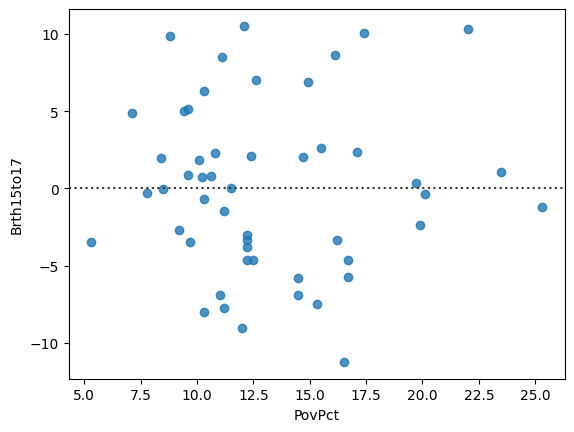

In [5]:
sns.residplot(data=data, x='PovPct',y='Brth15to17')

In [6]:
inputs = data[['PovPct']]
inputs.head()

,PovPct
0,20.1
1,7.1
2,16.1
3,14.9
4,16.7


In [7]:
outputs = data[['Brth15to17']]
outputs.head()

,Brth15to17
0,31.5
1,18.9
2,35.0
3,31.6
4,22.6


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(inputs,outputs,test_size=0.2)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
models = LinearRegression()
models.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = models.predict(X_test)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
# R^2 cho toàn bộ dữ liệu
models.score(inputs,outputs)

0.5176919225472791

In [ ]:
# Score = 51,7% => mô hình phù hợp ~ 51% dữ liệu => chưa là một mô hình phù hợp

In [15]:
# R^2 cho tập train
models.score(X_train,y_train)

0.5940909233377085

In [16]:
# R^2 cho tập test
models.score(X_test,y_test)

0.043570240606709554

In [19]:
df = pd.DataFrame({'Actual':pd.DataFrame(y_test.values)[0].values,'Predicted':pd.DataFrame(y_pred)[0].values})
df

,Actual,Predicted
0,22.6,28.503097
1,26.5,25.427405
2,17.2,21.582789
3,31.6,25.734974
4,23.2,27.734174
5,24.7,18.660881
6,17.8,26.350113
7,37.6,38.960452
8,17.3,25.119836
9,15.7,28.195528


In [20]:
# The coefficients
models.coef_

array([[1.53784625]])

In [21]:
models.intercept_

array([2.82106498])

In [22]:
x_now = [[15]]
y_now = models.predict(x_now)
y_now

array([[25.88875871]])

In [24]:
reg_line = models.predict(inputs)

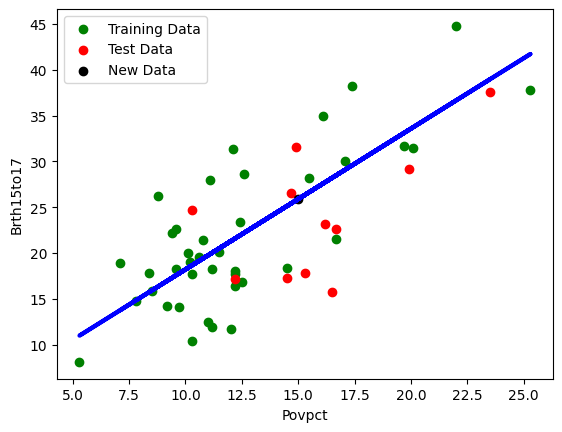

In [25]:
# Plot outputs
plt.scatter(X_train, y_train, color='green', label="Training Data")
plt.scatter(X_test, y_test, color='red', label= "Test Data")
plt.scatter(x_now, y_now, color='black', label= "New Data")
plt.plot(inputs,reg_line, color="blue", linewidth=3)
plt.xlabel("Povpct")
plt.ylabel("Brth15to17")
plt.legend()
plt.show()

# Polynomial

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
inputs_pr1 = PolynomialFeatures(degree=3).fit_transform(inputs)

In [32]:
inputs.shape, inputs_pr1.shape

((51, 1), (51, 4))

In [33]:
X2_train, X2_test, y2_train, y2_test = train_test_split(inputs_pr1,outputs,test_size=0.2)

In [34]:
clf = LinearRegression()
clf.fit(X2_train,y2_train)

LinearRegression()

In [35]:
y2_pred = clf.predict(X2_test)

In [36]:
from sklearn.metrics import r2_score

In [38]:
score = r2_score(y2_test,y2_pred)
score

0.5591768011122578